In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir( "C:/Users/Miray/Desktop")
os.getcwd()

'C:\\Users\\Miray\\Desktop'

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [4]:
odv=pd.read_csv("odev.csv")
df=odv.copy()
df.head()


C:\Users\Miray\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (128,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [5]:
kat_df=df.select_dtypes(include=["object"])
kat_df.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [6]:
df.loc[df[df["ind_420"] == "?"].index] = np.nan 


In [7]:
df["ind_422"] = df["ind_422"].astype('float64')
df["ind_420"] = df["ind_420"].astype('float64')
df.dropna()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
5,45.0,41.0,100.000000,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,...,-78.1,-84.0,-185.0,-386.0,1.000000,0.794403,0.730549,-15.176927,-35.722047,-37.098277
6,49.0,45.0,100.000000,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,...,-71.7,-84.0,-184.0,-386.0,1.000000,0.854144,0.746727,-15.176298,-35.720567,-37.096740
7,51.0,49.0,92.857143,35.714286,57.142857,77.015062,69.155269,11.55,13.86,15.86,...,-69.0,-81.0,-181.0,-383.0,0.432099,0.832974,0.723536,-15.172902,-35.712575,-37.088440
8,52.0,51.0,85.714286,28.571429,57.142857,71.153131,58.458047,9.05,14.02,14.39,...,-62.7,-75.0,-175.0,-377.0,0.000000,0.908407,0.705342,-15.164979,-35.693926,-37.069073
9,49.0,52.0,78.571429,21.428571,57.142857,71.849045,59.819306,8.40,11.26,11.59,...,-64.6,-77.0,-177.0,-379.0,0.000000,0.833898,0.690449,-15.167369,-35.699550,-37.074913


In [8]:
kat_df=df.select_dtypes(include=["object"])
kat_df.head()

,ind_109
0,GREEN
1,GREEN
2,GREEN
3,GREEN
4,GREEN


In [9]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [10]:
for i in df.select_dtypes(include=["object"]).columns:
    print(i,": ",df[i].value_counts().count())

ind_109 :  2


In [11]:
df.dropna()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
5,45.0,41.0,100.000000,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,...,-78.1,-84.0,-185.0,-386.0,1.000000,0.794403,0.730549,-15.176927,-35.722047,-37.098277
6,49.0,45.0,100.000000,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,...,-71.7,-84.0,-184.0,-386.0,1.000000,0.854144,0.746727,-15.176298,-35.720567,-37.096740
7,51.0,49.0,92.857143,35.714286,57.142857,77.015062,69.155269,11.55,13.86,15.86,...,-69.0,-81.0,-181.0,-383.0,0.432099,0.832974,0.723536,-15.172902,-35.712575,-37.088440
8,52.0,51.0,85.714286,28.571429,57.142857,71.153131,58.458047,9.05,14.02,14.39,...,-62.7,-75.0,-175.0,-377.0,0.000000,0.908407,0.705342,-15.164979,-35.693926,-37.069073
9,49.0,52.0,78.571429,21.428571,57.142857,71.849045,59.819306,8.40,11.26,11.59,...,-64.6,-77.0,-177.0,-379.0,0.000000,0.833898,0.690449,-15.167369,-35.699550,-37.074913


In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().values.any()

False

In [14]:
columns = ['20_target','50_target']
df.drop(columns, inplace=True, axis=1)

In [15]:
df.ind_109.unique()

array(['GREEN', 'RED'], dtype=object)

In [16]:
dms=pd.get_dummies(df[['ind_109']])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [17]:
y=df["90_target"]
X_=df.drop(["ind_109","90_target"],axis=1).astype("float64")
# X'in alacağı değerlerden kategorikleri ve hedef değişkeni sildik.
X_.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522


In [18]:
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1) #dummy haliyle concat yaparak bağımsız değişken dataframe'i oluşturduk.
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (3844, 133)
y_train (3844,)
X_test (1282, 133)
y_test (1282,)


In [38]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm_model=lm.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lm=lm_model.predict(X_test) #eğitim setinde kurmuş olduğum modeli kullanarak indirgenmiş test seti için tahmin değerleri


In [39]:
print("Lineer Reg. Test hatası:",np.sqrt(mean_squared_error(y_test,y_pred_lm)))

Lineer Reg. Test hatası: 34.089905780540285


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA()

In [21]:
X_reduced_train=pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[-1.04446534e+01,  9.22358716e-01,  3.69114003e-01,
         2.96601874e+00, -8.56214296e-01, -1.33058615e+00,
         7.25366748e-01,  1.55635318e-01,  9.37302973e-01,
         2.29363858e-01, -7.06371035e-01, -3.98206787e-01,
        -7.36308561e-02,  3.16590067e-01, -1.19307002e+00,
        -1.40191432e+00, -1.08865801e-01,  2.34155060e+00,
         9.44869389e-01, -2.40462944e-01,  7.81035583e-01,
        -1.60968561e+00,  1.00367668e+00, -8.17774893e-01,
        -8.54168915e-01,  2.46634329e-01, -5.02361134e-02,
         1.38917766e-01,  1.04002175e+00, -2.22431562e-02,
        -2.50161708e-01,  3.36058136e-01,  2.31292686e-01,
        -6.20058285e-01, -2.84544604e-01,  4.80320723e-01,
         3.88907090e-01, -1.79816681e-03,  8.21209027e-01,
         5.00904745e-01,  9.79327946e-01, -2.05221597e-01,
        -4.78691565e-01,  7.42200729e-02,  2.94815982e-01,
        -2.37105683e-01, -5.49620522e-01,  6.43255147e-01,
        -3.14556108e-01, -4.48689510e-01,  3.31222224e-0

In [22]:
pca2=PCA()

In [23]:
X_reduced_test=pca2.fit_transform(scale(X_test))

In [24]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100) 

array([36.95, 49.21, 55.06, 59.53, 62.88, 65.77, 68.35, 70.38, 72.25,
       73.96, 75.56, 77.03, 78.41, 79.68, 80.9 , 82.07, 83.09, 84.01,
       84.86, 85.69, 86.49, 87.24, 87.91, 88.57, 89.18, 89.77, 90.31,
       90.8 , 91.27, 91.71, 92.13, 92.54, 92.92, 93.29, 93.64, 93.97,
       94.28, 94.58, 94.87, 95.15, 95.41, 95.65, 95.88, 96.11, 96.32,
       96.52, 96.71, 96.89, 97.05, 97.21, 97.36, 97.5 , 97.64, 97.77,
       97.9 , 98.02, 98.13, 98.23, 98.32, 98.41, 98.49, 98.57, 98.65,
       98.73, 98.8 , 98.87, 98.94, 99.  , 99.06, 99.12, 99.17, 99.22,
       99.27, 99.31, 99.35, 99.39, 99.43, 99.46, 99.49, 99.52, 99.55,
       99.58, 99.61, 99.64, 99.67, 99.69, 99.71, 99.73, 99.75, 99.77,
       99.79, 99.81, 99.82, 99.83, 99.84, 99.85, 99.86, 99.87, 99.88,
       99.89, 99.9 , 99.91, 99.92, 99.93, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94,

([<matplotlib.axis.XTick at 0x1f3d7ba7dd8>,
 <a list of 133 Text xticklabel objects>)

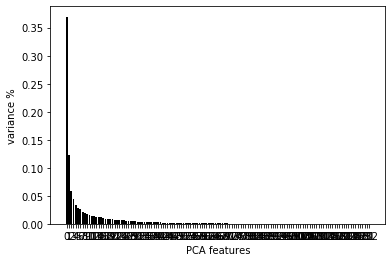

In [25]:
import matplotlib.pyplot as plt
features= range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [27]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=pcr_model.predict(X_reduced_test) #eğitim setinde kurmuş olduğum modeli kullanarak indirgenmiş test seti için tahmin değerleri
np.sqrt(mean_squared_error(y_test,y_pred))

37.87017559388654

In [29]:
from sklearn import model_selection 

In [30]:
cv_10 = model_selection.KFold(n_splits=10,
                             shuffle = False,
                             random_state=1)

In [31]:
lm = LinearRegression()
RMSE=[]
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score= np.sqrt(-1*model_selection.cross_val_score(lm,
                                                     X_reduced_train[:,:i],
                                                     y_train.ravel(),
                                                     cv=cv_10,
                                                     scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

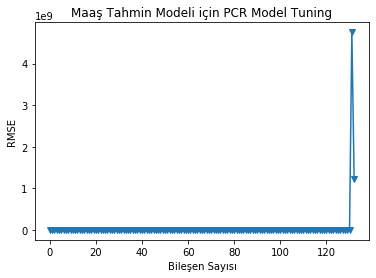

In [32]:
plt.plot(RMSE,'-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli için PCR Model Tuning');

In [33]:
for i in range (len(RMSE)):
    if RMSE[i] == min(RMSE):
        print (i)

126


_PCA sonrası 126 değişken ile modeli yeniden fit edip test hatasına bakacağım._

In [40]:
pca_126=PCA()
lm= LinearRegression()
X_reduced_train4=pca_126.fit_transform(scale(X_train))
X_reduced_test4=pca_126.fit_transform(scale(X_test))
pcr_model_=lm.fit(X_reduced_train4[:,0:126],y_train) 
y_pred_train=pcr_model_.predict(X_reduced_train4[:,0:126])
print("Train Hatası:", np.sqrt(mean_squared_error(y_train,y_pred_train))) #train hatası
y_pred_test=pcr_model_.predict(X_reduced_test4[:,0:126])
print("Test Hatası:", np.sqrt(mean_squared_error(y_test,y_pred_test)))      

Train Hatası: 32.440302542404616
Test Hatası: 37.78242932614333


# CART FOR REGRESSİON

In [41]:
pca_126=PCA(n_components=126)
X_rtrain=pca_126.fit_transform(scale(X_train))
X_rtest=pca_126.fit_transform(scale(X_test))


In [42]:
cart = DecisionTreeRegressor()
cart_model=cart.fit(X_rtrain,y_train)

In [43]:
y_pred_cart = cart_model.predict(X_rtest)
np.sqrt(mean_squared_error(y_test, y_pred_cart))

49.85059131156241

In [44]:
y=df["90_target"]
X_=df.drop(["ind_109","90_target"],axis=1).astype("float64")
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1)

In [89]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (3844, 133)
y_train (3844,)
X_test (1282, 133)
y_test (1282,)


In [108]:
cart2 = DecisionTreeRegressor()
cart_model2=cart2.fit(X_train,y_train)

In [91]:
y_pred_cart2 = cart_model2.predict(X_test)
print("Cart test seti hatası:", np.sqrt(mean_squared_error(y_test, y_pred_cart2)))

Cart test seti hatası: 21.59347093652004


CART MODEL TUNING

In [ ]:
cart_params = {"min_samples_split": range(2,150),
               "min_samples_leaf": [20,30,50],
               "max_leaf_nodes": range(5,20)}

cart_cv_model = GridSearchCV(cart_model2, cart_params, cv=10, n_jobs=-1, verbose=2)
cart_cv_model.fit(X_train, y_train)
print("Cart için en iyi parametre sonuclari:", cart_cv_model.best_params_)


In [49]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=19, 
                                   min_samples_leaf=20, 
                                   min_samples_split=67)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
print("CART Test Hatası:", np.sqrt(mean_squared_error(y_test, y_pred)))

CART Test Hatası: 29.32500113413614


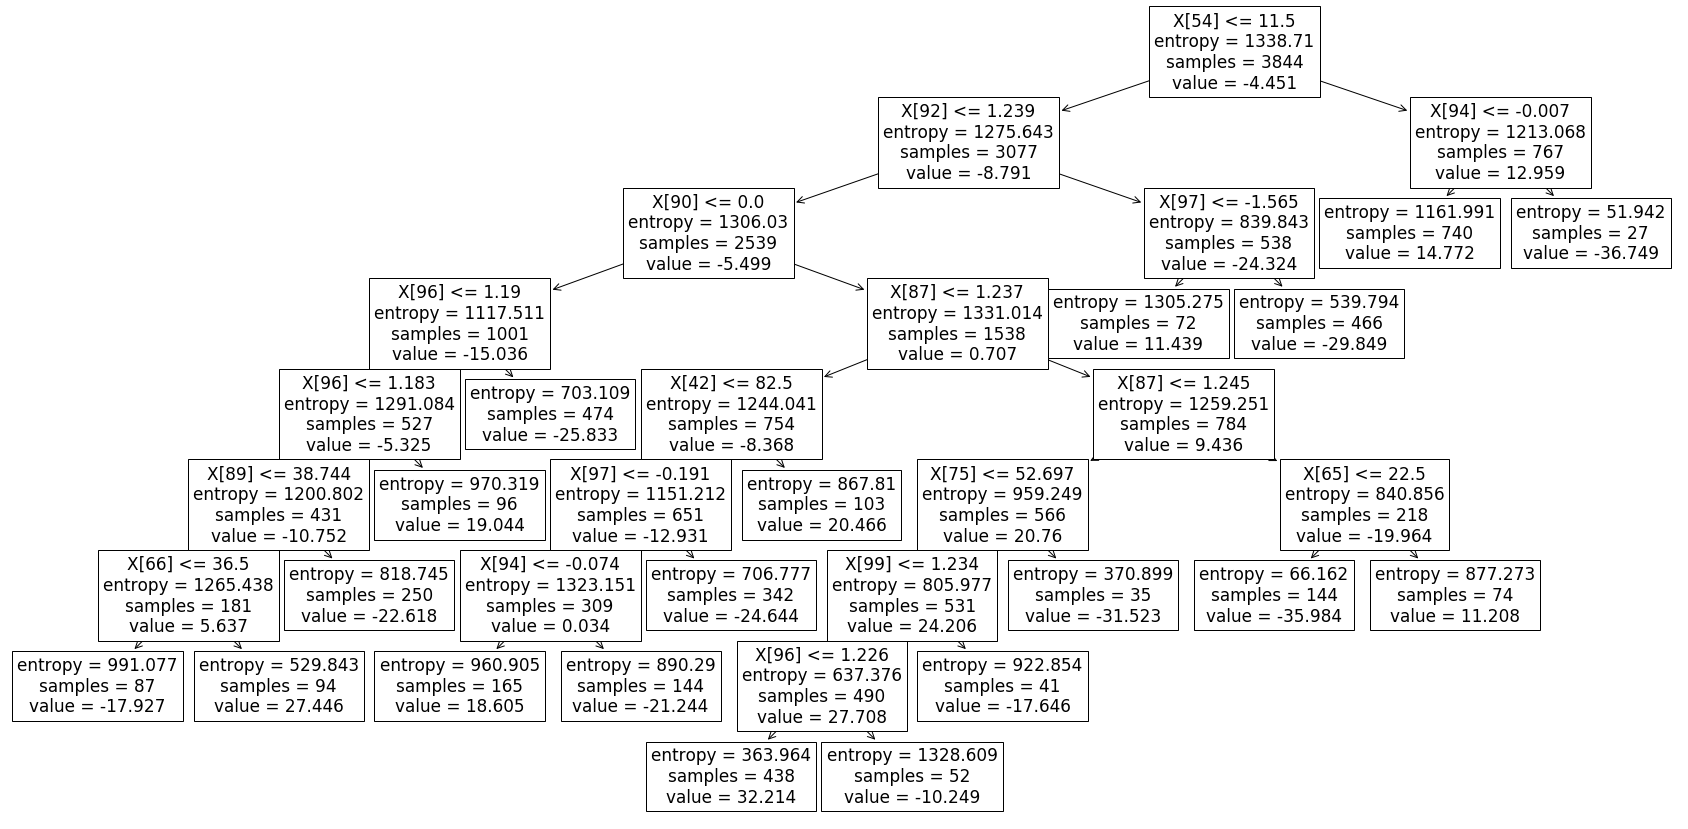

In [77]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

In [79]:
cart_params2 = {"min_samples_split": range(15,30),
               "max_depth": range(1,25)}

cart_cv_model2 = GridSearchCV(cart_model2, cart_params2, cv=10, n_jobs=-1, verbose=2)
cart_cv_model2.fit(X_train, y_train)
print("Cart için en iyi parametre sonuclari:", cart_cv_model2.best_params_)


Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1597 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2042 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2569 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  7.1min finished


Cart için en iyi parametre sonuclari: {'max_depth': 19, 'min_samples_split': 15}


In [145]:
cart_tuned2 = DecisionTreeRegressor(max_depth=19, 
                                  
                                   min_samples_split=15)
cart_tuned2.fit(X_train, y_train)
y_pred2_ = cart_tuned2.predict(X_test)
print("CART Tuning Test Hatası:", np.sqrt(mean_squared_error(y_test, y_pred2_)))

CART Tuning Test Hatası: 21.525871032727807


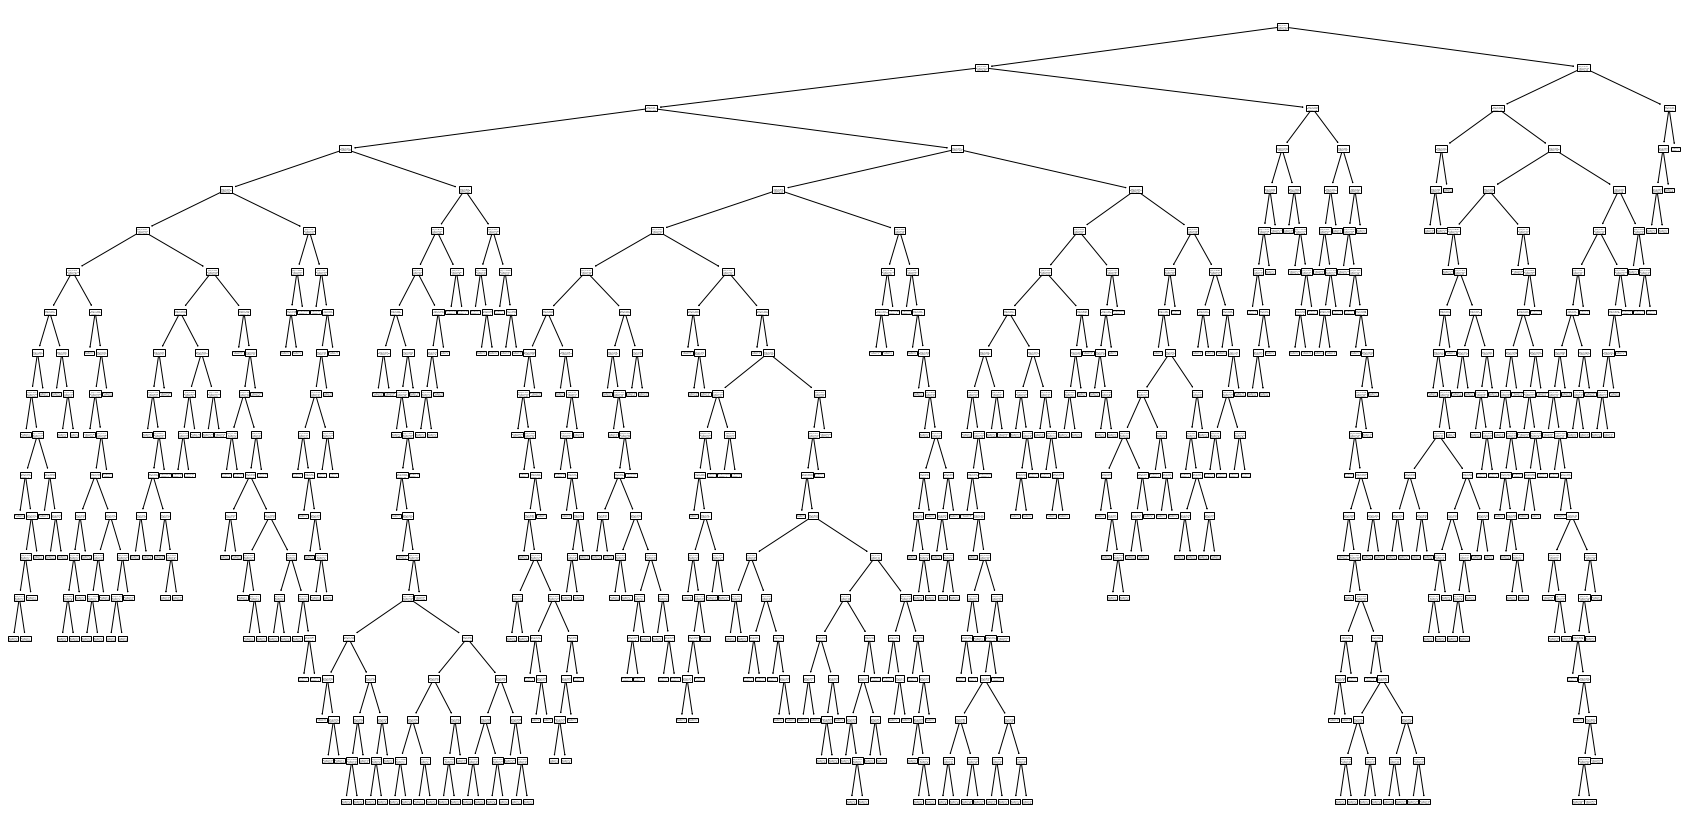

In [110]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned2);

# RANDOM FOREST FOR REGRESSİON

In [123]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)
y_pred_r=rfr_model.predict(X_test)
print("Random Forest Test Hatası:", np.sqrt(mean_squared_error(y_test, y_pred_r)))

C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Test Hatası: 16.668721766156384


Random Forest Model  Tuning

In [134]:
rfr_params = {"max_depth": list(range(1,10)),
              "max_features": [40,133],
              "n_estimators": [60,100]}

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)
print("random forest best  parameters:",rfr_cv_model.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 11.8min finished


random forest best  parameters: {'max_depth': 9, 'max_features': 133, 'n_estimators': 100}


In [136]:
rfr_tuned = RandomForestRegressor(max_depth=9,
                                  max_features=133,
                                  n_estimators=100)
rfr_tuned.fit(X_train, y_train)
y_pred_t = rfr_tuned.predict(X_test)
print("random forest tuning sonrası test hatası:",np.sqrt(mean_squared_error(y_test, y_pred_t)))

random forest tuning sonrası test hatası: 17.826140173491122


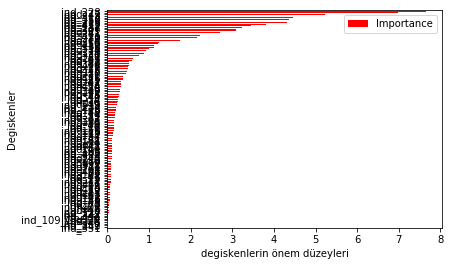

In [137]:
importance = pd.DataFrame({"Importance": rfr_tuned.feature_importances_*100},
                          index=X_train.columns)

importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.ylabel("Degiskenler")
plt.xlabel("degiskenlerin önem düzeyleri")
plt.show()


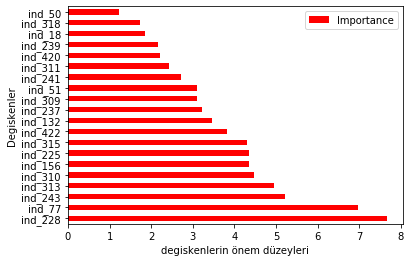

In [138]:
importance = pd.DataFrame({"Importance": rfr_tuned.feature_importances_*100},index=X_train.columns)
importance.sort_values(by= "Importance", axis=0,ascending=False)[0:20].plot(kind="barh",color="r")
plt.ylabel("Degiskenler")
plt.xlabel("degiskenlerin önem düzeyleri")
plt.show()

In [139]:
a = list(importance.sort_values(by= "Importance", axis=0,ascending=False)[0:11].T.columns)

In [129]:
a

['ind_228',
 'ind_77',
 'ind_243',
 'ind_310',
 'ind_315',
 'ind_313',
 'ind_156',
 'ind_237',
 'ind_225',
 'ind_422',
 'ind_309']

In [140]:
X1=X[a]

In [141]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_ttrain,X_ttest,y_ttrain,y_ttest= train_test_split(X1,y,test_size=0.25, random_state=42)
print("X_train",X_ttrain.shape)
print("y_train",y_ttrain.shape)
print("X_test",X_ttest.shape)
print("y_test",y_ttest.shape)

X_train (3844, 11)
y_train (3844,)
X_test (1282, 11)
y_test (1282,)


In [142]:
rfr_modell = RandomForestRegressor(random_state=42)
rfr_modell.fit(X_ttrain, y_ttrain)
y_pred_rff=rfr_modell.predict(X_ttest)
print("Random Forest Test Hatası:", np.sqrt(mean_squared_error(y_ttest, y_pred_rff)))

C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Test Hatası: 13.267501659447975


Yapay Sinir Ağı

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
x_test_scaled = scaler.transform(X_test)

In [61]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaled, y_train)
mlp_model

C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [62]:
y_pred_n = mlp_model.predict(x_test_scaled)
print("Yapay Sinir Ağı Test Hatası:",np.sqrt(mean_squared_error(y_test,y_pred_n)))

Yapay Sinir Ağı Test Hatası: 21.991022632855206


In [63]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train, y_train)
print("Yapay sinir ağı en iyi parametre değerleri:", mlp_cv_model.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 21.9min finished


Yapay sinir ağı en iyi parametre değerleri: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (300, 200, 150)}


In [64]:
mlp_tuned = MLPRegressor(alpha= 0.01, hidden_layer_sizes=(300,200,150), activation="relu")
mlp_tuned.fit(x_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
y_pred = mlp_tuned.predict(x_test_scaled)
print("Yapay Sinir Ağı Test Hatası:",np.sqrt(mean_squared_error(y_test,y_pred)))

Yapay Sinir Ağı Test Hatası: 19.887935420026235
